# How to turn a Raspberry Pi into a Plex home media server

This project involves turning a Raspberry Pi 4 into a Plex home media server, where all media (e.g. movies, tv shows, photos etc) are stored locally and may be delivered within the network.

Plex is a client-server setup where the client directly streams data from the Plex media server. This setup means you can have all your movies, music, and photos located on the one device, the server. In this case, we will be using the Raspberry Pi.

You can then have multiple clients connect to the same server. It is great as you don’t need to have multiple copies of the same media across several devices.

An extension to this project involves setting up the server with VPN (virutal private network) to allow for remote access.

# Step 1: Gather all required components

We'll need several components to complete this project, some of which you may already have lying around:
- [Raspberry Pi 4](https://www.raspberrypi.org/products/raspberry-pi-4-model-b/)
- [A power supply](https://www.raspberrypi.org/products/type-c-power-supply/)
- [microSD card](https://www.pbtech.co.nz/product/MEMSAM11022/Samsung-EVO-PLUS-64GB-Micro-SD-with-Adapter---up-t)
- [External HDD](https://www.pbtech.co.nz/product/HDDWDX2721/WD-Elements-SE-Portable-2TB-25-USB-30-External-HDD)
- [HMDI - microHDMI cable](https://www.raspberrypi.org/products/micro-hdmi-to-standard-hdmi-a-cable/)
- Ethernet cable
- Any keyboard, mouse and HMDI compatible computer monitor

# Step 2: Install Raspberry Pi operating system

Flash a microSD card with a Raspberry Pi operating system using the [Raspberry Pi Imager](https://www.raspberrypi.org/software/). I used the default raspbian OS as shown below. Be careful about which microSD card you use as this flashing process will wipe the drive. It may take a while for it to fully install the OS. Once this is done, eject the microSD card and insert into the Raspberry Pi.


For more in-depth notes on installing the OS, follow this [guide](https://www.pcmag.com/how-to/beginners-guide-how-to-get-started-with-raspberry-pi).

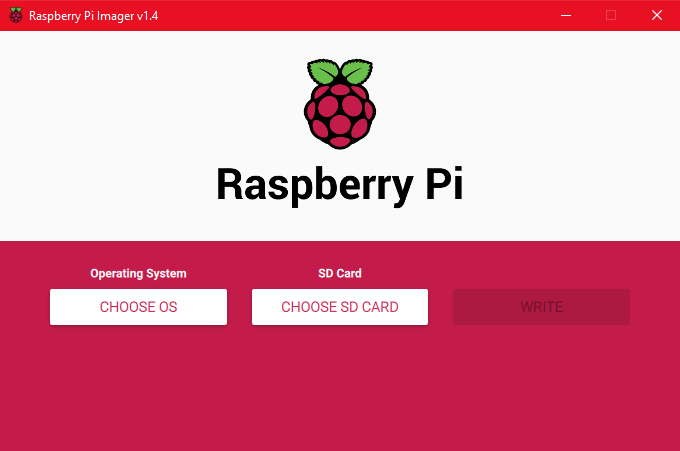

In [1]:
from IPython import display

display.Image("./Images/RaspberryPiImager.png")

# Step 3: Preparing Pi for Plex

Before installing the Plex Media Server software to the Raspberry Pi, we need first to ensure our operating system is entirely up to date by running the following two commands in the terminal.

*sudo apt-get update  
sudo apt-get upgrade*


# Step 4: enable HTTPS transfer during downloads

To install the Plex packages to the Raspberry Pi, we will need to add the official Plex package repository. The apt-transport-https package must be installed so that Raspbian’s package manager can also access these HTTPS sources. This package allows the “apt” package manager to retrieve packages over the “https” protocol that the Plex repository uses.

Install the package by running the command below.

*sudo apt-get install apt-transport-https*

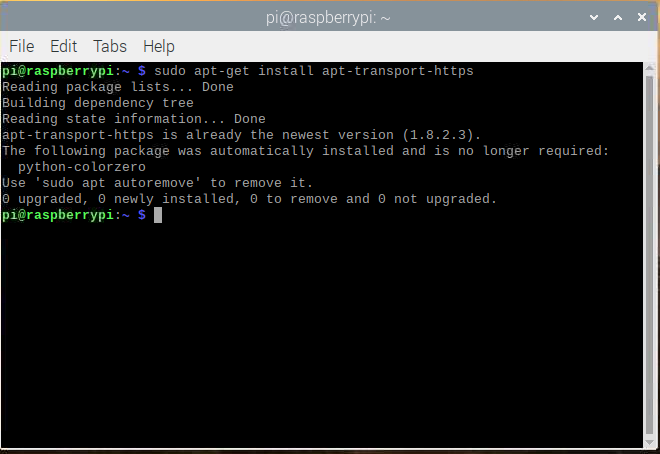

In [2]:
display.Image("./Images/RaspberryPi_HTTPS.png")

# Step 5: Add Plex repositories to the "apt" package managers key list

This key is used to ensure the files that you are downloading are in fact from that repository and signed by that key.

Run the following command to download and add the key to the package manager.

*curl https://downloads.plex.tv/plex-keys/PlexSign.key | sudo apt-key add -*

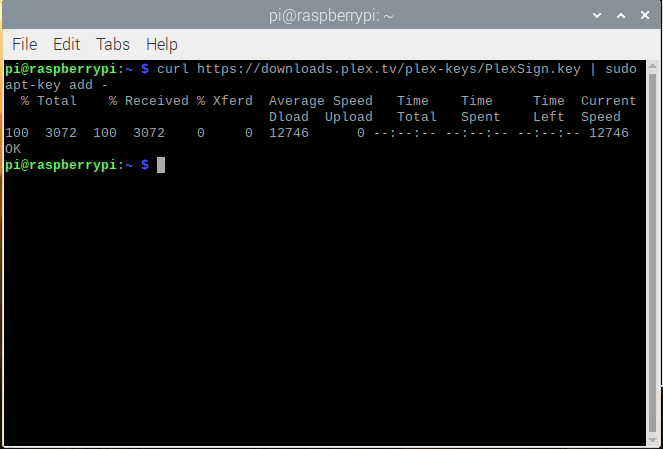

In [3]:
display.Image("./Images/RaspberryPi_APT.png")

# Step 6: Add official Plex repository

With the **Plex GPG key** now added, we can finally add the official plex repository to the sources list by running the following command.

*echo deb https://downloads.plex.tv/repo/deb public main | sudo tee /etc/apt/sources.list.d/plexmediaserver.list*

We'll need to run the **update** command once more to refresh our libraries as we've added another repository to our sources.

*sudo apt-get update*

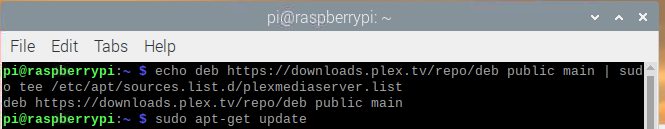

In [4]:
display.Image("./Images/RaspberryPi_GPGKey.png")

# Step 7: Installing Plex to your Raspberry Pi

Now that we have set up our Raspberry Pi so that it can read from Plex’s official package repositories we can go ahead and finally install the Plex Media server package to the Pi.

To install the “plexmediaserver” package, run the command below.

*sudo apt install plexmediaserver*

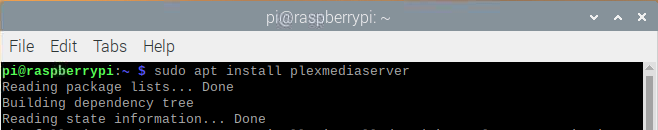

In [5]:
display.Image("./Images/RaspberryPi_Plex.png")

# Step 8: Setting a static IP addess for your Plex server

Now that we have installed Plex to our Raspberry Pi we should make sure that we are using a static IP address.

There are two reasons to use a static IP. One is that the IP will be easier to remember. Second is that it will make sure your Plex server can always be found at the same address.

To get your current IP address, enter the following command.

*hostname -I*

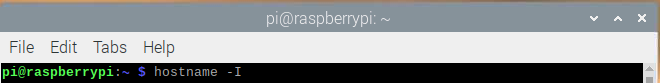

In [6]:
display.Image("./Images/RaspberryPi_IP.png")

Now open up the *cmdline.txt* file.

*sudo nano /boot/cmdline.txt*

At the bottom of this file, add the following line: (Replacing “YOUR IP” with the IP you got from using hostname -I)

*ip=YOUR IP*

Exit by pressing **CTRL** + **X** and then **Y** to save

Now simply restart the Pi by running the following command:

*sudo reboot*